In [46]:
# import libraires

#Data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
#mathematical functions
import numpy as np

#metrics
from sklearn.metrics import confusion_matrix,accuracy_score,plot_roc_curve,classification_report
#preprocessing
from sklearn.preprocessing import LabelEncoder, Normalizer
#anomally detection
from sklearn.ensemble import IsolationForest
#splitting
from sklearn.model_selection import train_test_split
#Modeling
import xgboost as xgb
import lightgbm as lgb


# EDA
- I will be doing some basic seeing the distribution of data 


# Data cleaning and preprocessing
- Encodeing and transforming values
- This will include some feature engineering 


# Model Training and Evalution
- measuring the performace of the model as well as the best metrics for evaluation


 - Firstly when loading the dataset it shows up as seen below where all values are stuffed into one. With a deeper look I saw the delimeter is semicolon and not a comma just adjusted that and pandas displays the data properly now
 - saving me some headaches ahead of time

In [47]:
#load dataset
smol = pd.read_csv('bank_marketing_data.csv')
smol

,age;job;marital;education;default;balance;housing;loan;contact;day;month;duration;campaign;pdays;previous;poutcome;target
0,30;unemployed;married;primary;no;1787;no;no;ce...
1,33;services;married;secondary;no;4789;yes;yes;...
2,35;management;single;tertiary;no;1350;yes;no;c...
3,30;management;married;tertiary;no;1476;yes;yes...
4,59;blue-collar;married;secondary;no;0;yes;no;u...
...,...
4516,33;services;married;secondary;no;-333;yes;no;c...
4517,57;self-employed;married;tertiary;yes;-3313;ye...
4518,57;technician;married;secondary;no;295;no;no;c...
4519,28;blue-collar;married;secondary;no;1137;no;no...


In [48]:
#loading dataset correctly
dataset = pd.read_csv('bank_marketing_data.csv', sep=';')
dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


# EDA

In [49]:
dataset.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
target       object
dtype: object

In [50]:
dataset.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
target       0
dtype: int64

In [51]:
def create_unq_plot():
    """ Custom Function to get unique and most frequnt values from 
        dataset columns that had the data type of Object"""
    
    def get_obj_cols():
        """ Nested Function to get the unique values and
            most frequent values from original dataset """
        obj_cols = []
        
        for col in dataset.columns:
            if dataset[col].dtype == 'O':
                obj_cols.append(col)
        return obj_cols


    d = {'column_name' : [] , 'unique_values' : [] , 'most_frequent_value' : []}

    for col in get_obj_cols():
        
        d['column_name'].append(col)
        d['unique_values'].append( len(dataset[col].value_counts().unique()) )
        d['most_frequent_value'].append( dataset[col].value_counts().index[0] )
        
    return pd.DataFrame(d).style.set_properties(**{'background-color': 'black','color': 'white'})

In [52]:
#visualizing custom func
create_unq_plot()

,column_name,unique_values,most_frequent_value
0,job,12,management
1,marital,3,married
2,education,4,secondary
3,default,2,no
4,housing,2,yes
5,loan,2,no
6,contact,3,cellular
7,month,12,may
8,poutcome,4,unknown
9,target,2,no


In [53]:
#Getting the min and max values for each column in the numeric_col list

# TODO : get a difference col to show difference between min and max cols ,as well as mean and std(standard deviation) [!DONE]

def create_min_max_df():
    """ Custom Function that creates a dataframe with column_name(from orignal dataset) 
        and get the min and max to put into dataframe"""
    
    def get_int_cols():
        """ Nested Function to get columns with int dtypes """
        
        int_cols = []
        
        for col in dataset.columns:
            if dataset[col].dtype != 'O':
                int_cols.append(col)
        return int_cols
    
    #can just call the cunction in the for loop
    #int_cols = get_int_cols()
    d = {'col_name' : [] , 'max' : [] , 'min' : [] , 'difference' : []}
    
    for i in get_int_cols():
        # using the absolute func because some values are negative
        d['difference'].append(dataset[i].max()  -  np.absolute(dataset[i].min()))
        d['min'].append(dataset[i].min())
        d['max'].append(dataset[i].max())
        d['col_name'].append(i)
    return pd.DataFrame(d).style.set_properties(**{'background-color': 'black','color': 'white'})

In [54]:
#visualizing custom func
create_min_max_df()

,col_name,max,min,difference
0,age,87,19,68
1,balance,71188,-3313,67875
2,day,31,1,30
3,duration,3025,4,3021
4,campaign,50,1,49
5,pdays,871,-1,870
6,previous,25,0,25


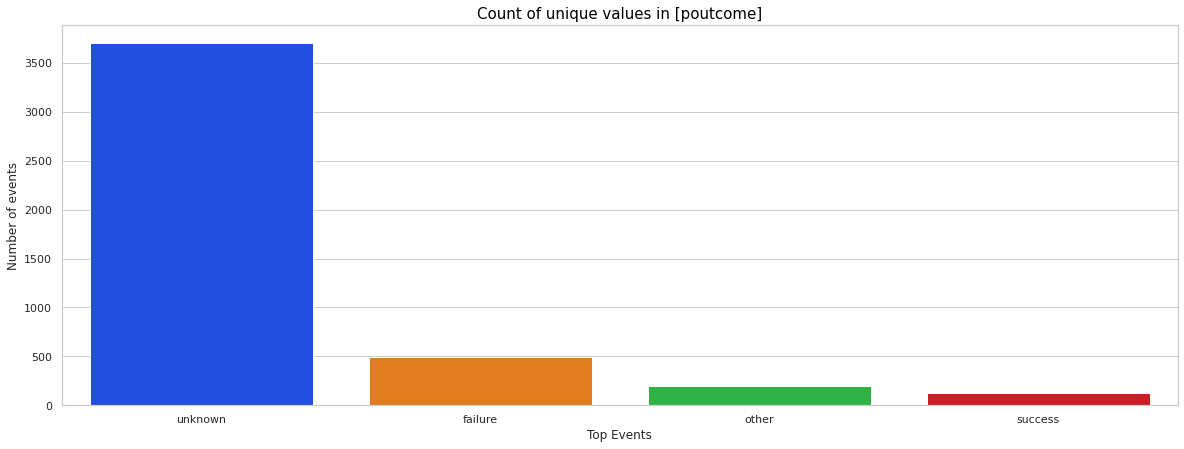

In [55]:
# Top 5 Events
#plotting the count of unique values in poutcome to see it's distribution
events = dataset["poutcome"].value_counts()
plt.figure(figsize = (20, 7))
sns.barplot(x = events[:5].index, y = events[:5].values , palette="bright")
plt.ylabel('Number of events')
plt.xlabel('Top Events')
plt.title('Count of unique values in [poutcome]', color = 'black', fontsize = 15)
plt.show()

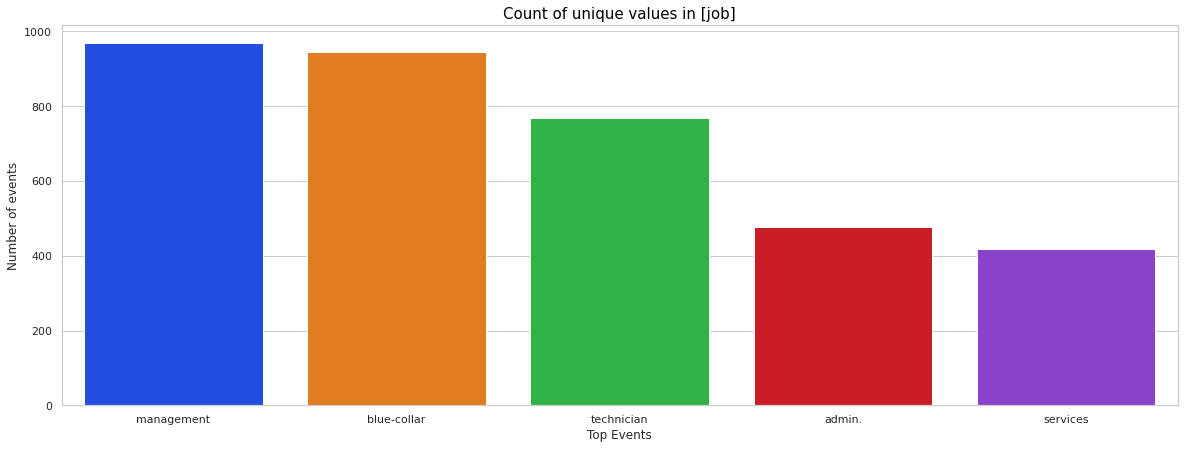

In [56]:
# Top 5 Events
#plotting the count of unique values in the job col to see it's distribution
events = dataset["job"].value_counts()
plt.figure(figsize = (20, 7))
sns.barplot(x = events[:5].index, y = events[:5].values , palette='bright')
plt.ylabel('Number of events')
plt.xlabel('Top Events')
plt.title('Count of unique values in [job]', color = 'black', fontsize = 15)
plt.show()

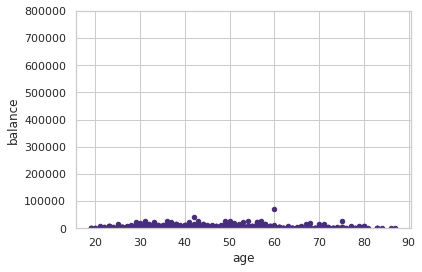

In [57]:
# TODO increase plot sizes
var = 'age'
data = pd.concat([dataset['balance'], dataset[var]], axis=1)
data.plot.scatter(x=var, y='balance', ylim=(0,800000));

<AxesSubplot:xlabel='age', ylabel='balance'>

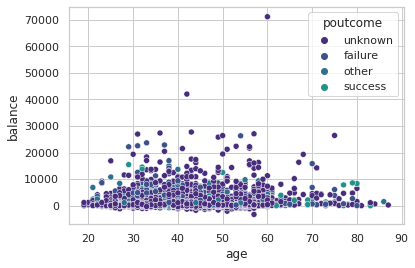

In [58]:
# TODO increase plot sizes
sns.scatterplot(dataset['age'] , y=dataset['balance'] , hue=dataset['poutcome'] )

<AxesSubplot:xlabel='age', ylabel='duration'>

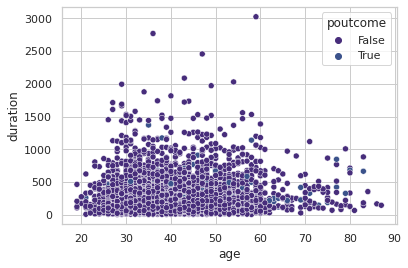

In [59]:
# TODO increase plot sizes
sns.scatterplot(dataset['age'] , y=dataset['duration'] , hue=dataset['poutcome'] == 'success')

<AxesSubplot:xlabel='age', ylabel='pdays'>

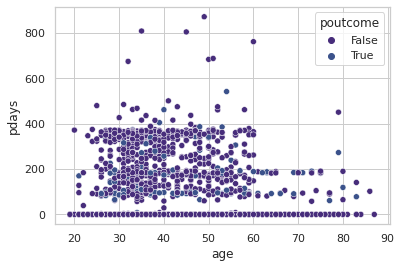

In [60]:
# TODO increase plot sizes
sns.scatterplot(dataset['age'] , y=dataset['pdays'] , hue=dataset['poutcome'] == 'success')

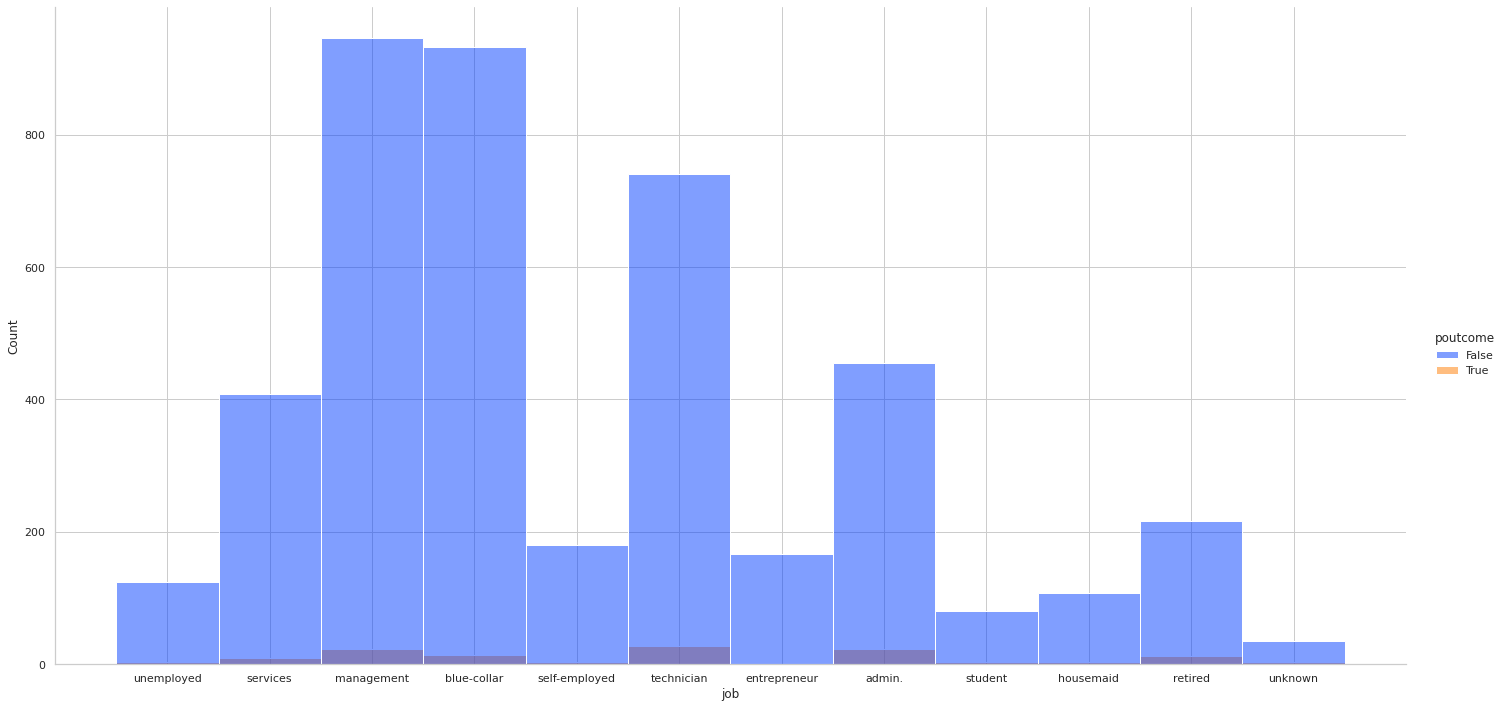

In [61]:
sns.set_style('whitegrid')
sns.set_palette('viridis', n_colors=7)
sns.set_context('notebook')
sns.displot(dataset, x="job", hue=dataset['poutcome'] == 'success',height=10,aspect=2,legend='poutcome success',palette='bright')

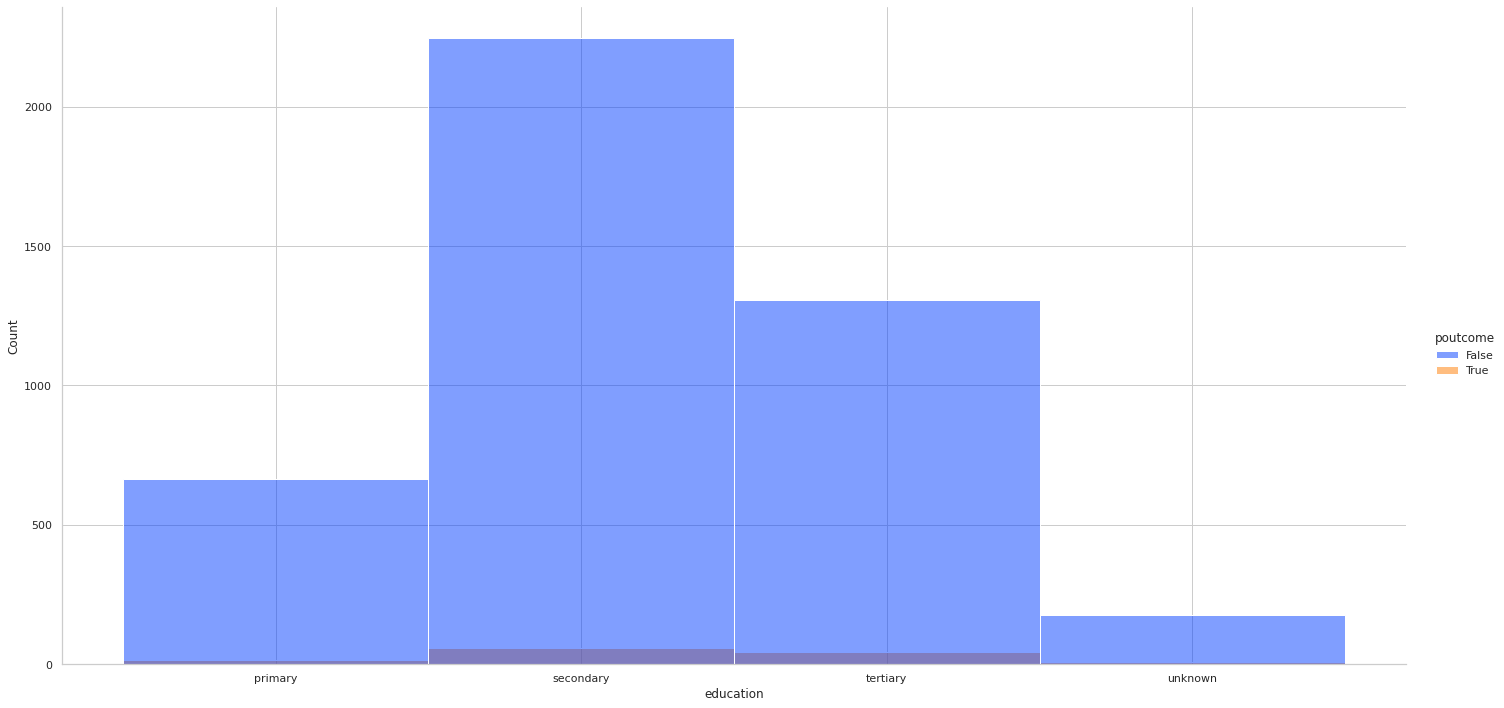

In [62]:
sns.set_style('whitegrid')
sns.set_palette('viridis', n_colors=7)
sns.set_context('notebook')
sns.displot(dataset, x="education", hue=dataset['poutcome'] == 'success',height=10,aspect=2,legend='poutcome success',palette='bright')

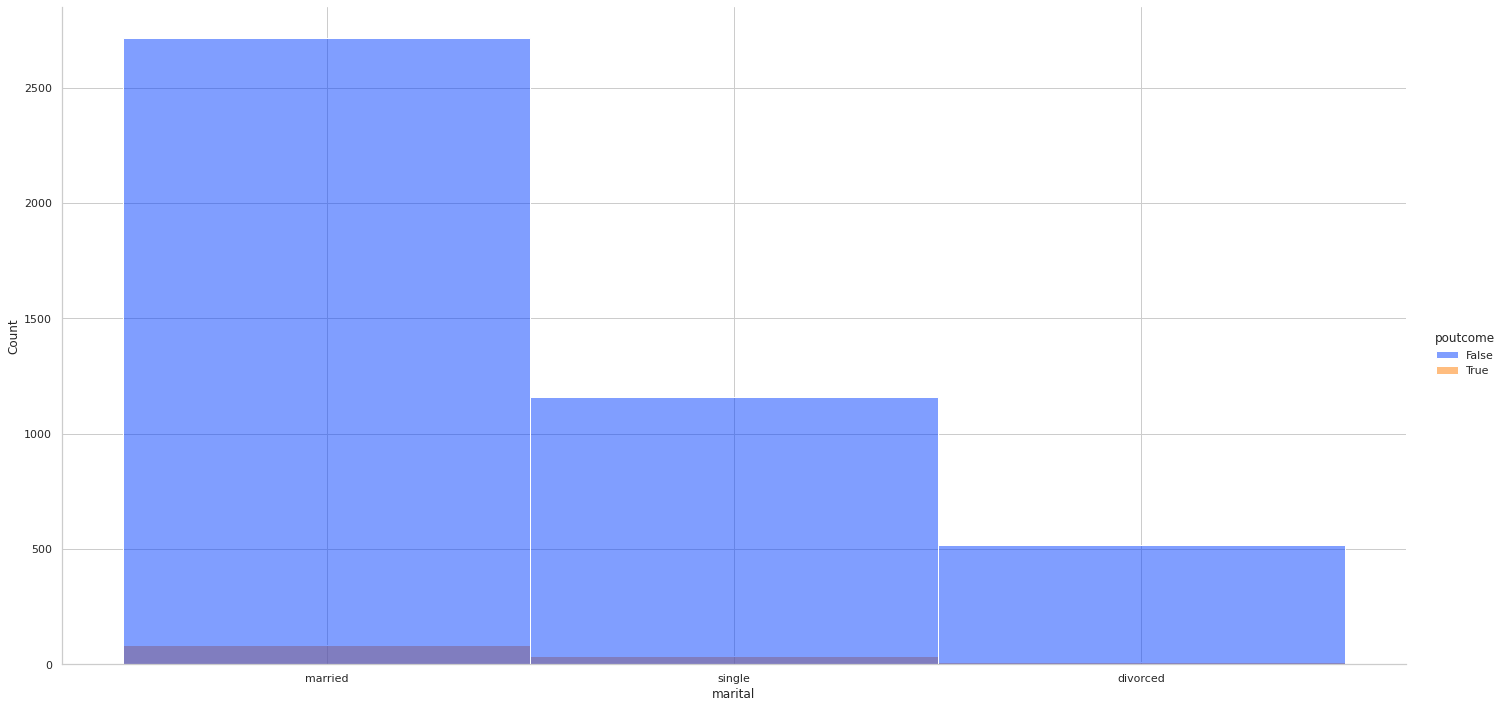

In [63]:
sns.set_style('whitegrid')
sns.set_palette('viridis', n_colors=7)
sns.set_context('notebook')
sns.displot(dataset, x="marital", hue=dataset['poutcome'] == 'success',height=10,aspect=2,legend='poutcome success',palette='bright')

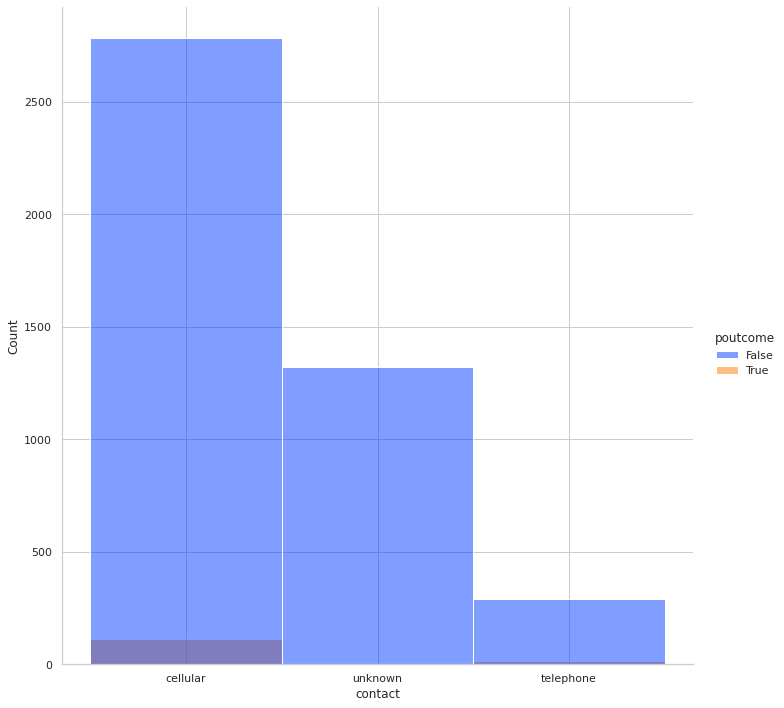

In [64]:
sns.set_style('whitegrid')
sns.set_palette('viridis', n_colors=7)
sns.set_context('notebook')
sns.displot(dataset, x="contact", hue=dataset['poutcome'] == 'success',height=10,aspect=1,legend='poutcome success',palette='bright')

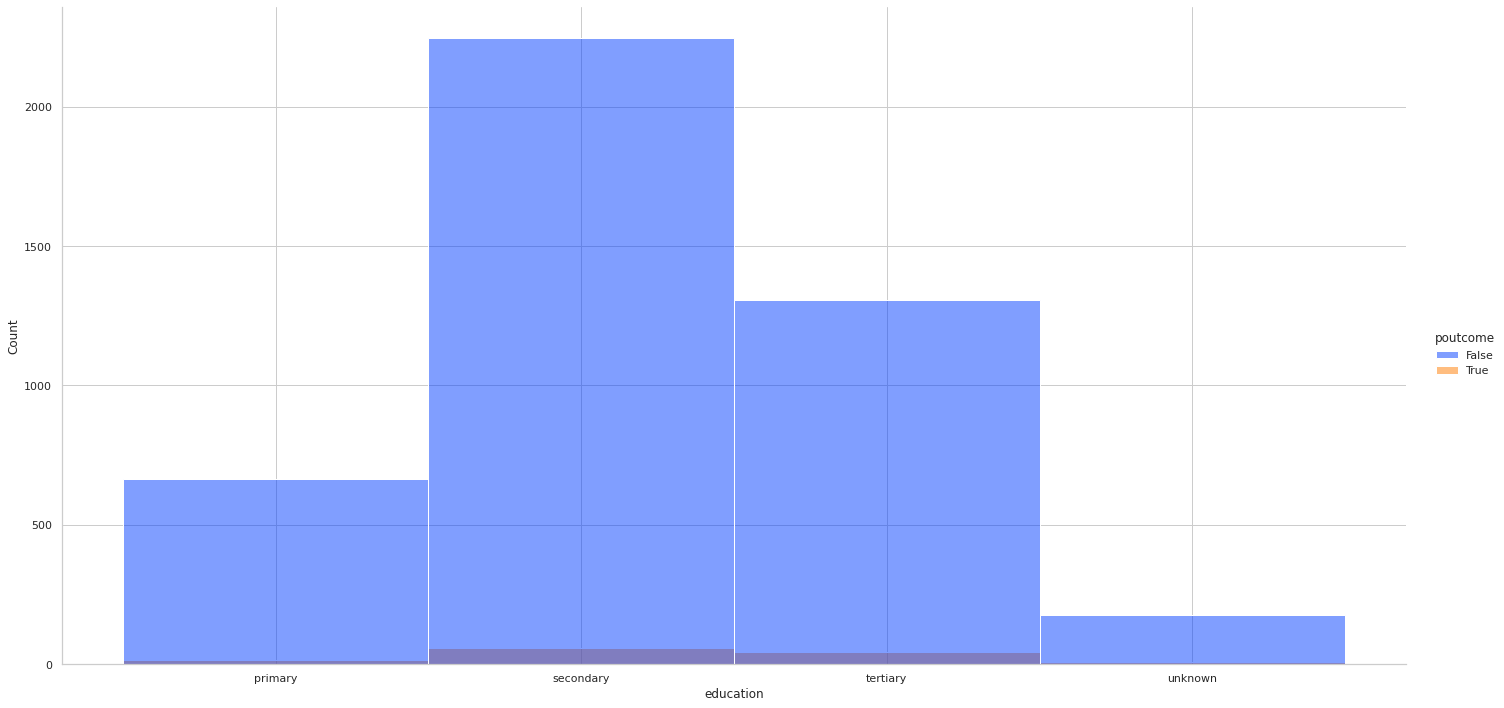

In [65]:
sns.displot(dataset , x="education",hue=dataset['poutcome'] == 'success',palette='bright' , height=10 , aspect=2)

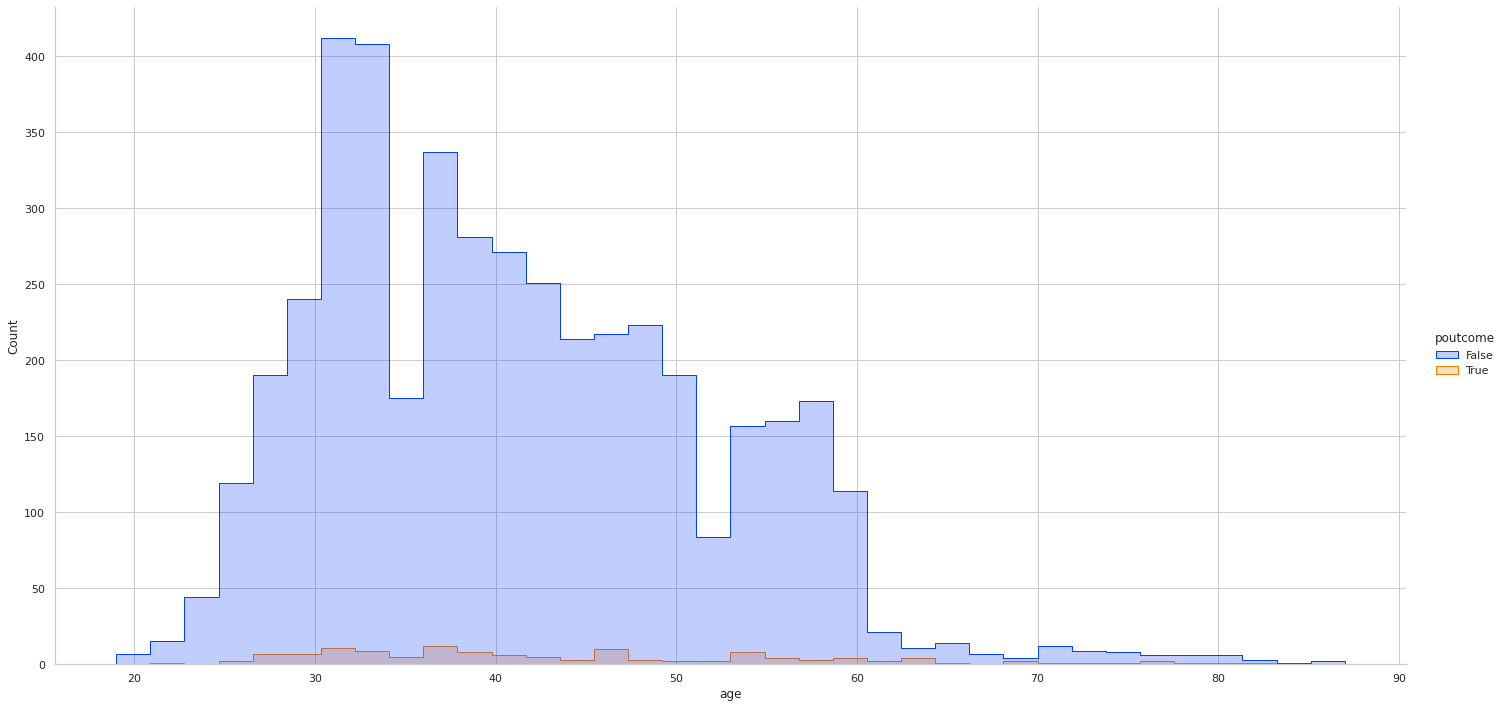

In [66]:
sns.displot(dataset , x="age",hue=dataset['poutcome'] == 'success',palette='bright',element='step' , height=10 , aspect=2)

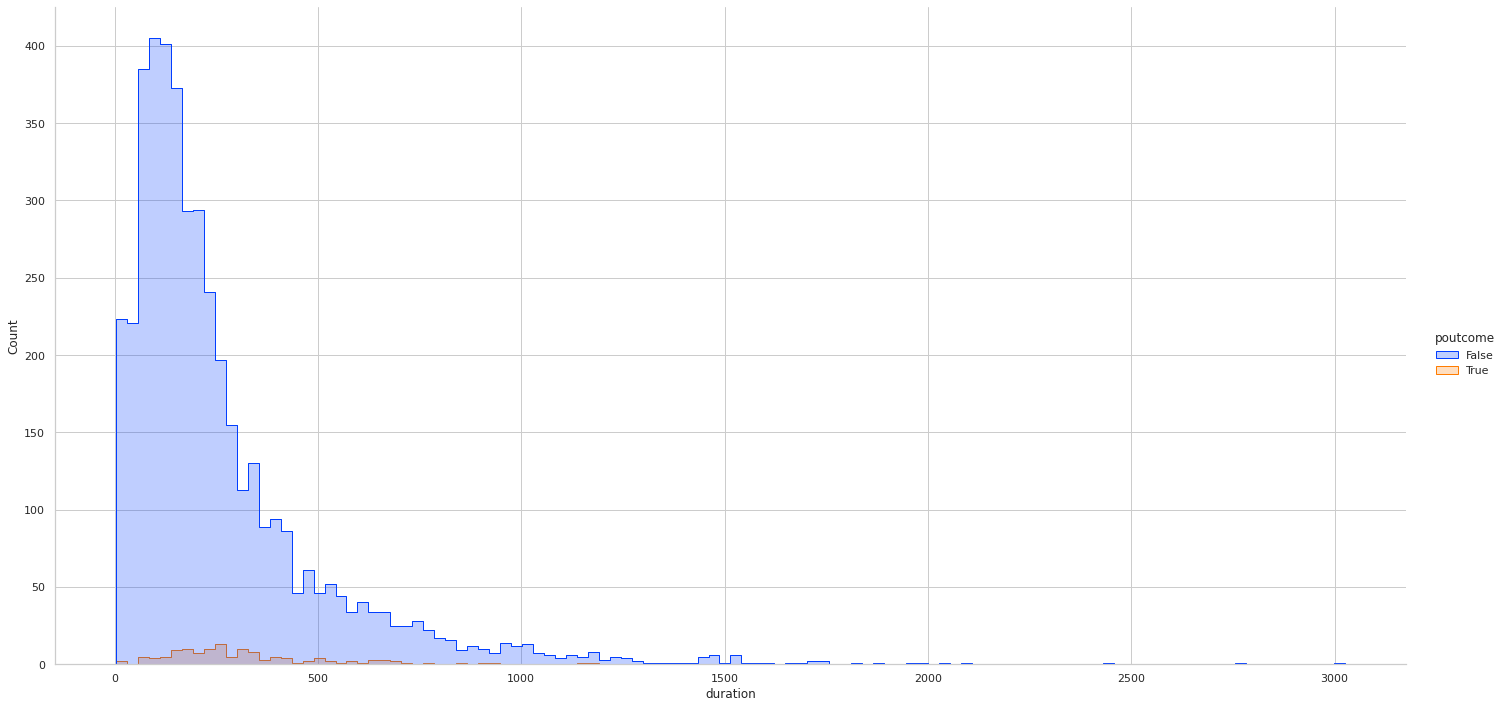

In [67]:
sns.displot(dataset , x="duration",hue=dataset['poutcome'] == 'success',palette='bright',element='step' , height=10 , aspect=2)

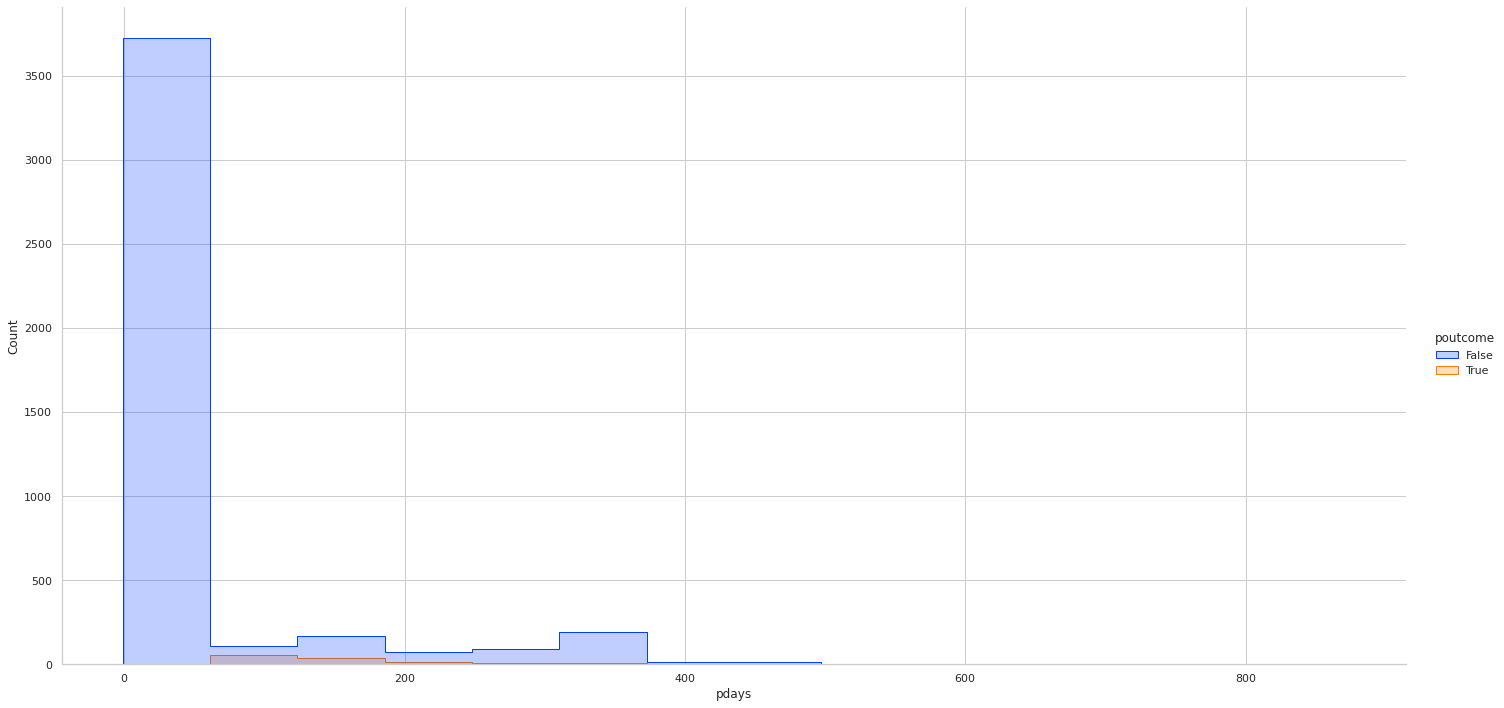

In [68]:
sns.displot(dataset , x="pdays",hue=dataset['poutcome'] == 'success',palette='bright',element='step' , height=10 , aspect=2)

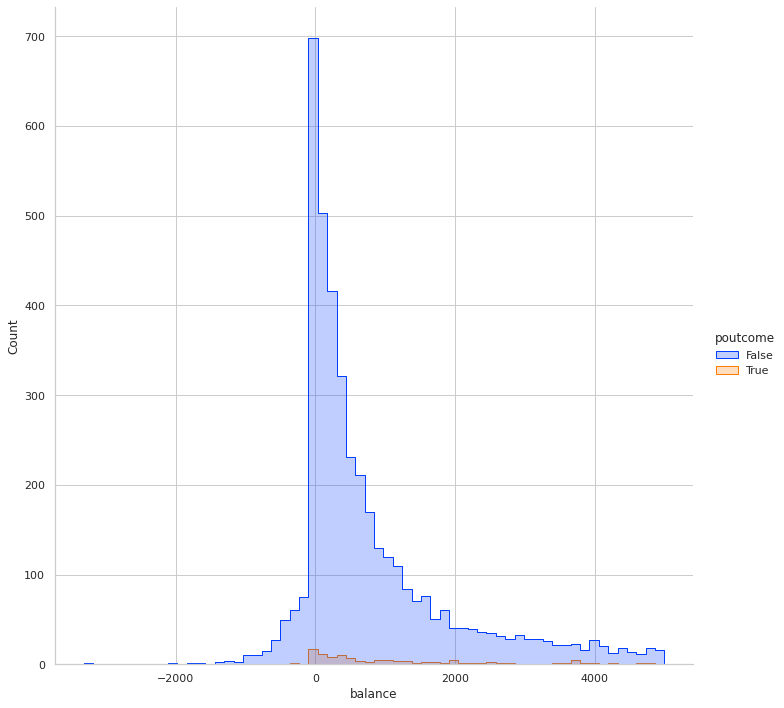

In [69]:
#the difference in distribution is huge, limited the
sns.displot(dataset.loc[dataset['balance'] < 5000] , x="balance",hue=dataset['poutcome'] == 'success',palette='bright',element='step' , height=10 , aspect=1)

# Preprocessing and feature engineering on the dataset

 - from earlier interactions with the dataset using EDA I was able to get and understanding of the dataset, its data types and distribution
 - Main objectives in the cells below(in no particular order) : 
       - Data preprocessing
       - removing outliers 
       - Normalizing or Scaling the dataset
       - Feature engineering 
       

### Removing Outliers

In [70]:
#Getting numeric columns
num_cols = []
for col in dataset.columns:
    if dataset[col].dtype != 'O':
        num_cols.append(col)

# To remove outliers I will be using sklearns iForest to remove them
-Isolation forest is a machine learning algorithm for anomaly detection.
 It's an unsupervised learning algorithm that identifies anomaly by isolating outliers in the data.
-Isolation Forest is based on the Decision Tree algorithm. It isolates the outliers by randomly selecting a feature from the given set of features and then randomly selecting a split value between the max and min values of that feature. This random partitioning of features will produce shorter paths in trees for the anomalous data points, thus distinguishing them from the rest of the data.

<img src="https://www.researchgate.net/publication/352017898/figure/fig1/AS:1029757483372550@1622524724599/Isolation-Forest-learned-iForest-construction-for-toy-dataset.png" alt="Alternative text" />

In [71]:
import gc
# I will be using sklearns IsolationForest to get the outliers due to it's ease of use and reliable performance
df5 = dataset.copy()
del dataset
gc.collect()

9588

In [72]:
model=IsolationForest(n_estimators=150, max_samples='auto', contamination=float(0.1), max_features=1.0)
model.fit(df5[num_cols])

IsolationForest(contamination=0.1, n_estimators=150)

In [73]:
scores=model.decision_function(df5[num_cols])
anomaly=model.predict(df5[num_cols])

df5['scores']=scores
df5['anomaly']=anomaly
#just vizualizing the transformations maded
df5.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target,scores,anomaly
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,0.139546,1
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,-0.006999,-1
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0.049406,1
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,0.101776,1
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,0.101897,1
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no,0.064158,1
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no,0.048634,1
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no,0.147534,1
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no,0.153724,1
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no,0.068861,1


In [74]:
anomaly = df5.loc[df5['anomaly']==-1]
anomaly_index = list(anomaly.index)
print('Total number of outliers is:', len(anomaly))

Total number of outliers is: 452


In [75]:
# dropping outliers
# I choose not to drop the outliers because I am loosing too much information 
#df_out5 = df5.drop(anomaly_index, axis = 0).reset_index(drop=True)
print('Original Dataset Shape : ' , df5.shape[0])
print('New Dataset Shape : ' , df5.shape[0])

Original Dataset Shape :  4521
New Dataset Shape :  4521


In [76]:
drop_cols = ['anomaly' , 'scores']
df5.drop(drop_cols,1,inplace=True)

### Feature Engineering

In [77]:
df5['poutcome'].value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

In [78]:
le_cols = ['job' , 'marital' , 'education']

def encode_cols(dataset , cols):
    """ Creating function and Using label Encoder to encode values """
    copy = dataset.copy(deep=True)
    le = LabelEncoder()
    
    for col in cols:
        copy[col] = le.fit_transform(copy[col])
        
    return copy

In [79]:
df5 = encode_cols(df5 , le_cols)
df5

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,30,10,1,0,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,7,1,1,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,4,2,2,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,4,1,2,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,1,1,1,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,6,1,2,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,9,1,1,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,1,1,1,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [80]:

def columns_groups_freq(dataset , main_column , sec_column=None ):
    """ Custom function that helps in grouping features and getting the frequncey 
        main_column = is the primary variable that will be used to create features 
        sec_column = is optional to get drill down and create a deeper feature"""
    col_used = []
    data = dataset.copy()
    
    
    if sec_column:
        data[f'{main_column}'+'_'+f'{sec_column}'+'_freq'] = (data.groupby([f'{main_column}' , f'{sec_column}'])[f'{sec_column}'].transform('count') / data[f'{main_column}'].count()).round(3)

    else:
        data[f'{main_column}'+'_freq'] = (data.groupby(f'{main_column}')[f'{main_column}'].transform('count') / data[f'{main_column}'].count()).round(3)
        
    #col_used.append(column)
    #if drop_used_col == True:
    #    data.drop(column , 1, inplace=True)
    return data

In [81]:
df5 = columns_groups_freq(df5 , 'job')
df5 = columns_groups_freq(df5 , 'month')
df5

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target,job_freq,month_freq
0,30,10,1,0,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,0.028,0.018
1,33,7,1,1,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,0.092,0.309
2,35,4,2,2,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0.214,0.065
3,30,4,1,2,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,0.214,0.117
4,59,1,1,1,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,0.209,0.309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no,0.092,0.156
4517,57,6,1,2,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no,0.040,0.309
4518,57,9,1,1,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no,0.170,0.140
4519,28,1,1,1,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no,0.209,0.049


In [82]:
def mean_std_columns(dataset ,trans_column , main_column , sec_column=None):
    
    """ main_column & sec_column --> columns we will be grouping data by sec_column(optional)
        trans_col --> column we will apply transformation too eg(mean,std,max)
    """ 
    data = dataset.copy()
    if sec_column:
        data[f'{main_column}_'+f'{sec_column}'+f'_{trans_column}'+'_mean'] = (data.groupby([f'{main_column}' , f'{sec_column}'])[f'{trans_column}'].transform('mean')).round(3)
        data[f'{main_column}_'+f'{sec_column}'+f'_{trans_column}'+'_std'] = (data.groupby([f'{main_column}' , f'{sec_column}'])[f'{trans_column}'].transform('std')).round(3)
        data[f'{main_column}_'+f'{sec_column}'+f'_{trans_column}'+'_max'] = (data.groupby([f'{main_column}' , f'{sec_column}'])[f'{trans_column}'].transform('max')).round(3)
        
    else:
        data[f'{main_column}_'+f'{trans_column}'+'_mean'] = (data.groupby(f'{main_column}')[f'{trans_column}'].transform('mean')).round(3)
        data[f'{main_column}_'+f'{trans_column}'+'_std'] = (data.groupby(f'{main_column}')[f'{trans_column}'].transform('std')).round(3)
        data[f'{main_column}_'+f'{trans_column}'+'_max'] = (data.groupby(f'{main_column}')[f'{trans_column}'].transform('max')).round(3)
        
    return data

In [83]:
#creating features with function above
df5 = mean_std_columns(df5 ,'balance' , 'job' )
df5 = mean_std_columns(df5 ,'balance' , 'education' )
df5 = mean_std_columns(df5 ,'balance' , 'contact' )

df5 = mean_std_columns(df5 ,'pdays' , 'job' )
df5 = mean_std_columns(df5 ,'pdays' , 'education' )
df5 = mean_std_columns(df5 ,'pdays' , 'contact' )

df5 = mean_std_columns(df5 ,'duration' , 'job' )
df5 = mean_std_columns(df5 ,'duration' , 'education' )
df5 = mean_std_columns(df5 ,'duration' , 'contact' )

df5.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,contact_pdays_max,job_duration_mean,job_duration_std,job_duration_max,education_duration_mean,education_duration_std,education_duration_max,contact_duration_mean,contact_duration_std,contact_duration_max
0,30,10,1,0,no,1787,no,no,cellular,19,...,871,301.266,351.177,3025,261.709,271.988,3025,267.113,252.190,3025
1,33,7,1,1,no,4789,yes,yes,cellular,11,...,871,262.487,259.997,1971,269.864,260.897,2029,267.113,252.190,3025
2,35,4,2,2,no,1350,yes,no,cellular,16,...,871,260.537,254.516,2087,256.881,254.291,2769,267.113,252.190,3025
3,30,4,1,2,no,1476,yes,yes,unknown,3,...,808,260.537,254.516,2087,256.881,254.291,2769,261.753,273.002,2769
4,59,1,1,1,no,0,yes,no,unknown,5,...,808,278.162,265.349,2456,269.864,260.897,2029,261.753,273.002,2769


In [84]:
#popping the target column to use later for model evaluation

def create_target_var(dataframe):
    """ Creating a target variable to use later for calculating metrics """
    data = dataframe.copy()
    
    target_event = "success"
    data[ "Target" ] = data[ "poutcome" ] == target_event
    return LabelEncoder().fit_transform(data.pop('Target'))

In [85]:
data_target = create_target_var(df5)
data_target

array([0, 0, 0, ..., 0, 0, 0])

In [86]:
#dropping poutcome because it is our target variable
df5.drop('poutcome',1,inplace=True)

In [87]:
#encding final columns
end_cols = []

for col in df5.columns:
    if df5[col].dtype == 'O':
        end_cols.append(col)

#calling function created earlier to encode some values     
df5 = encode_cols(df5 , end_cols)
df5

,age,job,marital,education,default,balance,housing,loan,contact,day,...,contact_pdays_max,job_duration_mean,job_duration_std,job_duration_max,education_duration_mean,education_duration_std,education_duration_max,contact_duration_mean,contact_duration_std,contact_duration_max
0,30,10,1,0,0,1787,0,0,0,19,...,871,301.266,351.177,3025,261.709,271.988,3025,267.113,252.190,3025
1,33,7,1,1,0,4789,1,1,0,11,...,871,262.487,259.997,1971,269.864,260.897,2029,267.113,252.190,3025
2,35,4,2,2,0,1350,1,0,0,16,...,871,260.537,254.516,2087,256.881,254.291,2769,267.113,252.190,3025
3,30,4,1,2,0,1476,1,1,2,3,...,808,260.537,254.516,2087,256.881,254.291,2769,261.753,273.002,2769
4,59,1,1,1,0,0,1,0,2,5,...,808,278.162,265.349,2456,269.864,260.897,2029,261.753,273.002,2769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,...,871,262.487,259.997,1971,269.864,260.897,2029,267.113,252.190,3025
4517,57,6,1,2,1,-3313,1,1,2,9,...,808,264.126,278.177,1877,256.881,254.291,2769,261.753,273.002,2769
4518,57,9,1,1,0,295,0,0,0,19,...,871,252.178,246.136,2029,269.864,260.897,2029,267.113,252.190,3025
4519,28,1,1,1,0,1137,0,0,0,6,...,871,278.162,265.349,2456,269.864,260.897,2029,267.113,252.190,3025


# Normilization or Standadization ?

Normalization is a part of data processing and cleansing techniques. The main goal of normalization is to make the data homogenous over all records and fields. It helps in creating a linkage between the entry data which in turn helps in cleaning and improving data quality. Whereas data standardization is the process of placing dissimilar features on the same scale. Standardized data in other words can be defined as rescaling the attributes in such a way that their mean is 0 and standard deviation becomes 1.


<img src="https://miro.medium.com/max/1100/1*HW7-kYjj6RKwrO-5WTLkDA.webp" alt="Alternative text" />

- Reason I selected Normilization over Standardization, Normalization is highly affected by outliers.
- since I removed certain outliers I belive Normilization is the best choice
- I will play around with both normilization and standadization to get more variety in the predictions

In [88]:
""" Use  code below if not using make_pipeline with transformations"""
new_data = Normalizer().fit_transform(df5)
new_data
gc.collect()

23

# Splitting Data

In [89]:
x_train , x_test , y_train , y_test = train_test_split(new_data , data_target , test_size=0.3,random_state=12)

# Training Models and making predictions

- From my experiences with Machine Learning I have noticed when training models, good data is always better than complex models
  the data is the fuel that propels the machine learning model to be able to get more insights. It has been 

# XGBoost

In [90]:
# Train XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

[[1304   15]
 [  29    9]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1319
           1       0.38      0.24      0.29        38

    accuracy                           0.97      1357
   macro avg       0.68      0.61      0.64      1357
weighted avg       0.96      0.97      0.96      1357

----------------------------------------------------------------------------------------------------


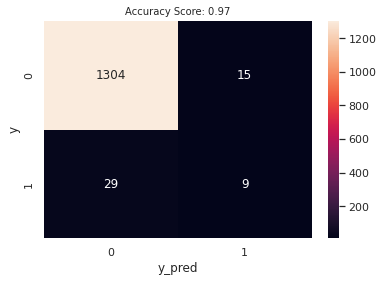

----------------------------------------------------------------------------------------------------


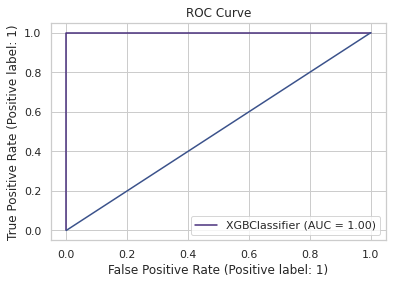

In [91]:
# confusion matrix
y_pred = xgb_model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print('--'*50)

# classification report
print(classification_report(y_test, y_pred))
print('--'*50)

# figure of classification report
def plot_confusion_matrix(y_test, y_pred):
    acc = round(accuracy_score(y_test, y_pred), 2)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()

plot_confusion_matrix(y_test, y_pred)
print('--'*50)

# getting roc curve
plot_roc_curve(xgb_model, x_train, y_train)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1])
plt.show()

# Lightgbm

In [92]:
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(x_train, y_train)

LGBMClassifier()

[[1307   12]
 [  28   10]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1319
           1       0.45      0.26      0.33        38

    accuracy                           0.97      1357
   macro avg       0.72      0.63      0.66      1357
weighted avg       0.96      0.97      0.97      1357

----------------------------------------------------------------------------------------------------


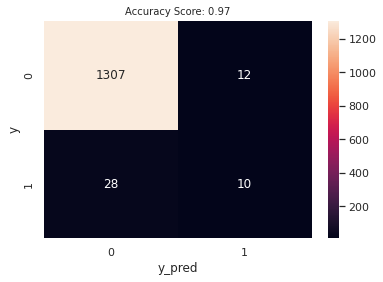

----------------------------------------------------------------------------------------------------


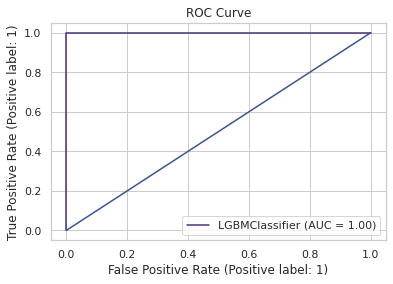

In [93]:
# confusion matrix
y_pred = lgb_model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print('--'*50)

# classification report
print(classification_report(y_test, y_pred))
print('--'*50)

# figure of classification report
def plot_confusion_matrix(y_test, y_pred):
    acc = round(accuracy_score(y_test, y_pred), 2)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()

plot_confusion_matrix(y_test, y_pred)
print('--'*50)

# getting roc curve
plot_roc_curve(lgb_model, x_train, y_train)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1])
plt.show()